In [6]:
import bpy
import numpy as np
import matplotlib.pyplot as plt
import tempfile
from PIL import Image
import warnings
from helper_functies import *
from IPython.display import Image as JupImage
import imageio
import bmesh
import mathutils
from mathutils import Vector
import os
tmpdir=tempfile.TemporaryDirectory()
size = [960,1280]
my_dpi = 96 # Afhankelijk van monitor

def get_img(tmpdir=tmpdir, size=size):
    scene = bpy.context.scene
    scene.render.resolution_x = size[1]
    scene.render.resolution_y = size[0]
    scene.render.resolution_percentage = 100
    scene.render.filepath=tmpdir.name+"/image"
    bpy.ops.render.render(write_still=True)
    img=Image.open(tmpdir.name+"/image.png")
    return img

In [7]:
zero(my_dpi)
#Set the light, RECOMMENDED TYPE :  SUN or POINT 
bpy.ops.object.lamp_add(type='SUN',location=(5,2,1))

#Load meshes .obj
file_loc = 'obj/test1.obj'
imported_object = bpy.ops.import_scene.obj(filepath=file_loc)
obj_object = bpy.context.selected_objects[0]

#bpy.ops.transform.resize(value=(0.005, 0.005, 0.005))
#bpy.ops.transform.translate(value = (3, -1, -1))

bpy.ops.transform.resize(value=(1, 1, 1))
bpy.ops.transform.translate(value = (0, 0, 0))


print('Imported name: ', obj_object.name)

#Set the environment lighting and the color of background
obj_object.active_material.use_cast_shadows = False
bpy.context.scene.world.light_settings.use_environment_light = True
bpy.context.scene.world.horizon_color = (1, 1, 1)    # the color of background
#bpy.context.object.rotation_euler[1] = 0.78


# implement Wireframe mode -----------------------------------------

#bpy.context.scene.render.use_freestyle = False
bpy.context.scene.render.use_freestyle = True
bpy.context.scene.render.use_edge_enhance = True
bpy.context.scene.render.edge_threshold = 255
obj_object.active_material.diffuse_color = (1, 1, 1)
obj_object.active_material.diffuse_intensity = 1
#bpy.context.scene.render.line_thickness_mode = 'RELATIVE'
bpy.context.scene.render.line_thickness_mode = 'ABSOLUTE'

#--------------------------------------------------------------------


#implement Normal mode ----------------------------------------------

##### JUNYOUNG : ADD TEXTURE FROM IMAGE AND APPLY TO SLECTED OBJECT #####
#obj_object.active_material.use_shadeless = True

#realpath = "C:\mc23.jpg"
#try:
#    img = bpy.data.images.load(realpath)
#except:
#    raise NameError("Cannot load image %s" % realpath)

# Create image texture from image
#cTex = bpy.data.textures.new("NORMAL", type='IMAGE')
#cTex.image = img

# Create material note that it is not same as the "texture"
#mat = bpy.data.materials.new("NORMAL")

# Add texture slot for color texture
#mtex = mat.texture_slots.add()
#mtex.texture = cTex
#mtex.texture_coords = 'NORMAL'
#mtex.use_map_color_diffuse = True
#mtex.use_map_color_emission = True
#mtex.emission_color_factor = 1.0
#mtex.use_map_density = False
#mtex.mapping = 'FLAT'

# assign material to object
#obj_object.data.materials.append(mat)

# or overwrite an existing material slot via index operator
#obj_object.data.materials[0] = mat

#----------------------------------------------------------------------



(  0.0000 sec |   0.0000 sec) Importing OBJ 'obj/test1.obj'...
  (  0.0010 sec |   0.0010 sec) Parsing OBJ file...
    (  0.0030 sec |   0.0020 sec) Done, loading materials and images...
	Material not found MTL: 'obj\\test1.mtl'
    (  0.0040 sec |   0.0030 sec) Done, building geometries (verts:84 faces:164 materials: 1 smoothgroups:0) ...
    (  0.0060 sec |   0.0050 sec) Done.
  (  0.0070 sec |   0.0070 sec) Finished importing: 'obj/test1.obj'
Progress: 100.00%

Imported name:  chair_part1.001


<Figure size 800x800 with 0 Axes>

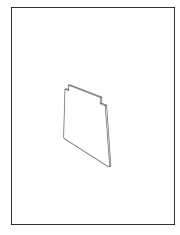

In [8]:
#Do render
bpy.ops.render.render()
bpy.data.images['Render Result'].save_render(filepath = '/tmp/image.png')

#Show Image
plt.imshow(get_img(size=[1280, 960]))
plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()